### Did the woman have at least one affair? 
### predict the classification for each woman.
#### Dataset :
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
#### Description of Variables :
The dataset contains 6366 observations of 9 variables:
- rate_marriage : woman's rating of her marriage (1: 'very poor', 2: 'poor', 3: 'fair', 4: 'good', 5: 'very good')
- age : woman's age
- yrs_married : number of years married
- children : number of children
- religious : woman's rating of how religious she is (1: 'not', 2: 'mildly', 3: 'fairly', 4: 'strongly')
- educ : level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation : woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
- occupation_husb : husband's occupation (same coding as above)
- affairs : time spent in extra-marital affairs
("affair" column: 1 represents having affairs, 0 represents not)

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score 
df = sm.datasets.fair.load_pandas().data

In [37]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
df.shape

(6366, 9)

In [4]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [5]:
df.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [6]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [7]:
df['affair'] = (df.affairs > 0).astype(int)

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [9]:
df = df.drop('affairs', axis = 1)

In [10]:
df['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [11]:
df['rate_marriage'].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [12]:
df['age'].value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

In [13]:
df['yrs_married'].value_counts()

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

In [14]:
df['children'].value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [15]:
df['religious'].value_counts()

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

In [16]:
df['educ'].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

In [17]:
df['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [18]:
df['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

<AxesSubplot:>

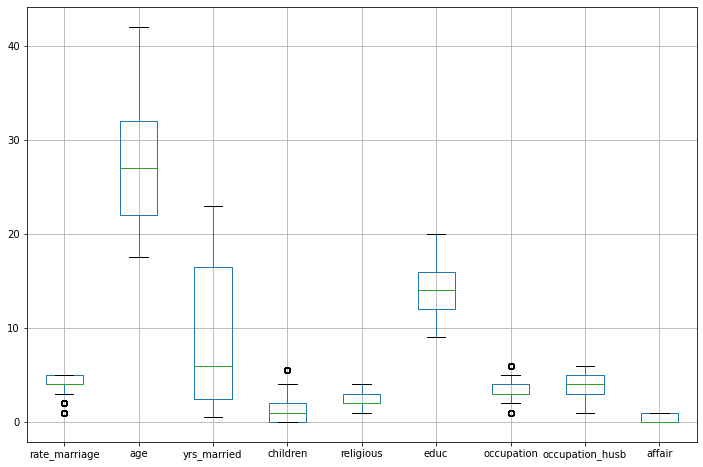

In [19]:
plt.figure(figsize=(12,8))
df.boxplot()

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
print('X_shape :',X.shape)
print('Y_shape :',y.shape)

X_shape : (6366, 8)
Y_shape : (6366,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [23]:
print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)

x_train shape : (5092, 8)
x_test shape : (1274, 8)


In [24]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
x_scaled = std_scale.fit_transform(x_train)

In [25]:
from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression()
LogisReg.fit(x_scaled, y_train)

LogisticRegression()

In [26]:
y_pred = LogisReg.predict(std_scale.transform(x_test))

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7040816326530612
[[759  93]
 [284 138]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       852
           1       0.60      0.33      0.42       422

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.68      1274



In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter' : range(100, 1100, 50),
         'multi_class' : ['auto', 'ovr', 'multinomial']
        }

In [31]:
grid = GridSearchCV(estimator=LogisReg, param_grid=param, n_jobs=1, cv=5, verbose=2)

In [32]:
grid.fit(x_scaled, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=100, mu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score 

[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=100, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg ....
[CV]  max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_

[CV]  max_iter=100, multi_class=auto, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=newton-cg ..


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=100, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=100, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=100, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, mult

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=100, multi_class=ovr, penalty=l1, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=100, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=100, multi_class=multinomial, penalty=l1, solver=saga, 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=100, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=100, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=100, multi_class=multinomial, penalty=none, solv

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=150, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=150, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=150, multi_class=auto, penal

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=150, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=150, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=150, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=150, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=150, multi_class=ovr, pen

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=150, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=liblinear ...
[CV]  max_iter=150, mult

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=150, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=150, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=150, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=150, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=150, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=200, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=200, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=200, multi_class=auto, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=200, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=200, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=200, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=200, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=200, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=200, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=200, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=200, multi_cl

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=200, multi_class=ovr, penalty=elasticnet, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=200, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=200, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, p

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=200, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=200

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=200, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=200, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=250, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=250, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=250, multi_class=au

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=250, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=250

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=250, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=250, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=250, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=250, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=250, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=250, multi_class=ovr, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=250, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=250, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=250, multi_class=ov

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=250, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=250, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=250, multi_class=multinomial, penal

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=250, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=250, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=300, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_clas

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=300, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=300, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=300, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=300, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=300, multi_class=ovr, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=300, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=ovr,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=300, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=300, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, p

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=300, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=300

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=300, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=300, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=350, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=350, multi_class=auto, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=au

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=350, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=350, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=350, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=350, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=350, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=350, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=350, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_cl

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=liblinear ...
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=350, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=350, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, p

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=350, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=350

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=350, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=350, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=400, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=400, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=400

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=400, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=400, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=400, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=400, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=400, multi_class=ovr, pen

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga ..
[CV]  max_iter=400, multi_class=ovr, penalty=elasticnet, solver=saga, to

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=400, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=400, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=400, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=400, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=400, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=400

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=400, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=400, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=450, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=450, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=450, mu

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=450, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=lbfgs, total=  

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=450, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=450, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, mult

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=450, multi_class=ovr, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=4

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=450, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=450, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=450, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=450, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=450, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=450, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear 
[CV]  max_iter=450, multi_class=multinomial, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=450, multi_cla

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=sag, total=   0.2s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=450, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=450, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=500, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=500, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=500, multi_cl

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag ..
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag ..
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag ..
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag ..
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag ..
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=elasticnet, solver=saga .
[CV]  max_iter=500, multi_class=auto, penalty=elasticnet, solver

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] max_iter=500, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=500, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=500, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=500, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=500, multi_class=ovr, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=500, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=500, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=500, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=500, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=500

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=500, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=500, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=500, multi_class=multinomial, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=550, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=550, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=550, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=550, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=550, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=550, multi_class=ovr, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=liblinear ...
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=550, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=550, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, p

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=550, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=550

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=550, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=550, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=600, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=600, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=600, multi_class=au

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=600, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=600, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=600, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=600, multi_class=ovr, penalty=l1, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=600, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=600, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=600, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=600, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=600, multi_class=multinomial, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=600, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=600, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV]  max_iter=600, multi_class=multinomial, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=multinomial, penalty=elasticnet, solver=saga 
[CV]  max_iter=600, multi_class=multinomial, penalty=elasticnet, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=newto

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=600, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=600, multi_class=multinomial, penalty=none, solv

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=650, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=650, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=650, multi_class=auto, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV] max_iter=650, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=650,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=650, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=650, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=650, multi_class=ovr, penalty=l1, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg 
[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=650, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=650, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=650, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=650, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalt

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=650, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=650

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, solver=saga, total=   0.1s
[CV] max_iter=650, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=650, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs ........
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=700, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=700, m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=700, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=700, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=700, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=700, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=700, multi_class=ovr, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=700, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=700, 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=700, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=700, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=700, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=700

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=700, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=700, multi_class=multinomial, penalty=none, solv

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=750, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=auto, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=750, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=750, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=750, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear .....
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=750, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=750, multi_cl

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=newton-cg ...
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=750, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=ov

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=lbfgs .
[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=lbfgs .
[CV]  max_iter=750, multi_class=multinomial, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l1, solver=lbfgs .
[CV]  max_iter=750, multi_class=multino

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=750, multi_class=multinomial, penalty=l2, solver=saga, tota

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=750, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=750, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=800, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=800, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=800, multi_class=auto, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=800, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=800, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=800, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=800, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=800, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=800, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=800, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=800, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=800, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=800, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=800, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=800, multi_class=ovr, pe

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=800, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=800, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, so

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=800, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, solver=saga, total=   0.1s
[CV] max_iter=800, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=800, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=850, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=auto

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=850, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=850, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=850, multi_class=auto, penalty=none, solver=sag, total=   0.1

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=850, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=850, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=850, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=850, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=l2, solver=newton-cg .....
[CV]  max_iter=850, multi_class

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=850, multi_class=ovr, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=elasticnet, solver=sag ...
[CV]  max_iter=850, multi_class=ov

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=850, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=850, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=850, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=850, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=850, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalt

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=850, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=850, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=850

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, solver=saga, total=   0.1s
[CV] max_iter=850, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=850, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=900, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=900, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=l1, solver=saga .........
[CV]  max_iter=900, multi_class=auto, penalty

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV] max_iter=900, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=900

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=900, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=auto, penalty=none, solver=saga .......
[CV]  max_iter=900, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=sag ...........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=l1, solver=saga ..........
[CV]  max_iter=900, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalt

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs .
[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=900, multi_class=ovr, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=900, multi_class=ovr, penalty=elasticne

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=900, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=900, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=900, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=900, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=900, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalt

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=900, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=900, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=900, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=950, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=liblinear ....
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=950, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=l1, solver=sag ..........
[CV]  max_iter=950, mu

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=950, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=newton-cg ..
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=lbfgs ......
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=950, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=liblinear ..
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=auto, penalty=none, solver=sag ........
[CV]  max_iter=950, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=95

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg .....
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=l1, solver=lbfgs .........
[CV]  max_iter=950, multi_cl

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs .......
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=liblinear ...
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=sag .........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=ovr, penalty=none, solver=saga ........
[CV]  max_iter=950, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=950, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=950, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=950, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l1, solver=saga ..
[CV]  max_iter=950, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=950, multi_class=multinomial, penalt

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=sag ...
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=l2, solver=saga ..
[CV]  max_iter=950, multi_class=multinomial, penalty=l2, solver=saga, total

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=lbfgs 
[CV]  max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=950, multi_class=multino

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=sag .
[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=950, multi_class=multinomial, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=950, multi_class=multinomial, penalty=none, solver=saga 
[CV]  max_iter=950, multi_class=multinomial, penalty=none, sol

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear ...
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=sag .........
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=sag .........
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=sag .........
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=sag .........
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=sag .........
[CV]  max_iter=1000, multi_class=auto, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=l1, solver=saga ........
[CV]  max_iter=1000, multi_class=a

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=newton-cg .
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs .....
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs .....
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs .....
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs .....
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs .....
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=lbfgs, total=   0.0s

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1000, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1000, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1000

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear ....
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear ....
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1000, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1000, multi_class=o

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg ..
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg ..
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg ..
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=liblinear ..
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1000, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=10

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1000, multi_class=mult

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga .
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga .
[CV]  max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag 
[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag 
[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag 
[CV]  max_iter=1000, multi_class=multinomial, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1000, multi_class=m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=sag 
[CV]  max_iter=1000, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=1000, multi_class=multinomial, penalty=none, solver=sag 
[CV]

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=1050, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l1, solver=saga ........
[CV]  max_iter=1050, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l1, solver=saga ........
[CV]  max_iter=1050, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l1, solver=saga ........
[CV]  max_iter=1050, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l1, solver=saga ........
[CV]  max_iter=1050, multi_class=auto, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l2, solver=newton-cg ...
[CV]  max_iter=1050, multi_class=auto, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=l2, solver=newton-cg ...
[CV]  max_iter=1050, multi_class=auto, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=1050

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m


[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=liblinear 
[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag .
[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag .
[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag .
[CV]  max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=elasticnet, solver=sag .
[CV]  max_iter=1050, multi_class=au

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=sag .......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=auto, penalty=none, solver=saga ......
[CV]  max_iter=1050, multi_class=auto, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel

[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=sag ..........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=l1, solver=saga .........
[CV]  max_iter=1050, multi_class=ovr, penalty=l1, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=ovr

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=newton-cg ..
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=newton-cg, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs ......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=lbfgs, total=   0.0s
[CV] m

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=sag ........
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=sag, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=saga .......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=saga .......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=ovr, penalty=none, solver=saga .......
[CV]  max_iter=1050, multi_class=ovr, penalty=none, solver=saga, total=   0.0s
[CV] max_iter=1050, multi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_sel


[CV] max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l1, solver=saga, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=mult

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag ..
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=saga, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=l2, solver=saga .
[CV]  max_iter=1050, multi_class=multinomial, penalty=l2, solver=sag

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\m

[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=newton-cg, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=lbfgs 
[CV]  

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=sag 
[CV]  max_iter=1050, multi_class=multinomial, penalty=none, solver=sag, total=   0.1s
[CV] max_iter=1050, multi_class=multinomial, penalty=none, solver=sag 
[CV]

[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'max_iter': range(100, 1100, 50),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [33]:
grid.best_params_

{'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [34]:
y_pred_grid = grid.predict(std_scale.transform(x_test))

In [35]:
print(accuracy_score(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

0.7040816326530612
[[759  93]
 [284 138]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       852
           1       0.60      0.33      0.42       422

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.68      1274



In [37]:
# saving the model to the local file system
import pickle
filename = 'LogisReg.pickle'
pickle.dump(LogisReg, open(filename, 'wb'))

In [29]:
lst = [[3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0]]

In [33]:
op = LogisReg.predict(std_scale.transform(lst))[0]

In [34]:
type(op)

numpy.int32

In [35]:
op2= int(op)
type(op2)

int